In [3]:
import numpy as np

import tensorflow as tf

In [8]:
tf.__version__

'2.15.0'

In [9]:
mnist = tf.keras.datasets.mnist
mnist # Load dataset

<module 'keras.api._v2.keras.datasets.mnist' from 'c:\\Users\\Mirsaid\\anaconda3\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)

(60000, 28, 28)


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2), # dropout to prevent overfitting
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2942 - accuracy: 0.9141 - val_loss: 0.1406 - val_accuracy: 0.9574
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1423 - accuracy: 0.9572 - val_loss: 0.1004 - val_accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1078 - accuracy: 0.9670 - val_loss: 0.0825 - val_accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0860 - accuracy: 0.9735 - val_loss: 0.0810 - val_accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0730 - accuracy: 0.9765 - val_loss: 0.0701 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0655 - accuracy: 0.9794 - val_loss: 0.0680 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0576 - accuracy: 0.9814 - val_loss: 0.0696 - val_accuracy:

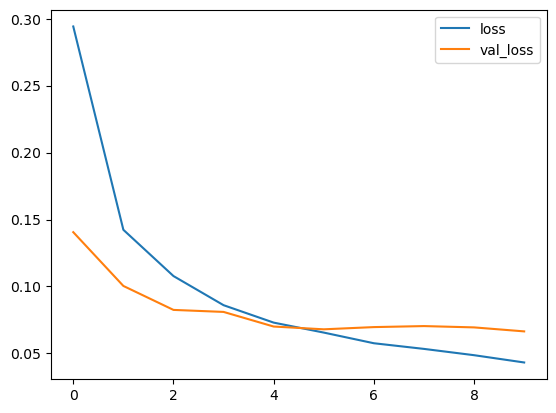

In [19]:
# Plot Loos iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

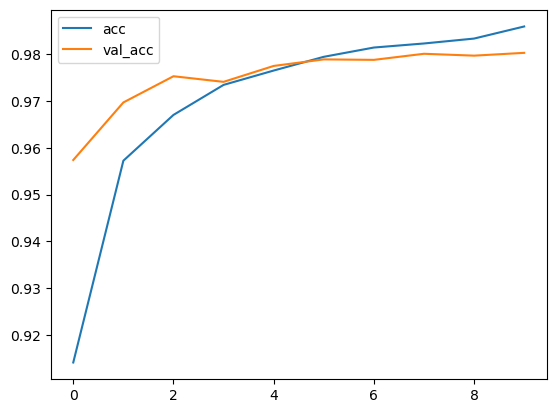

In [20]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [21]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9803
[0.06643770635128021, 0.9803000092506409]


313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[ 971    1    0    0    0    1    4    1    2    0]
 [   0 1123    3    1    0    0    3    1    4    0]
 [   4    4 1009    2    0    0    4    6    3    0]
 [   0    0    2  995    0    4    0    3    3    3]
 [   0    0    2    0  953    0    9    2    1   15]
 [   2    0    0    7    1  874    5    0    2    1]
 [   3    2    2    1    1    3  945    1    0    0]
 [   2    5    9    1    2    0    0  999    1    9]
 [   1    1    3    3    4    5    1    3  949    4]
 [   3    2    0    4    8    2    1    2    2  985]]


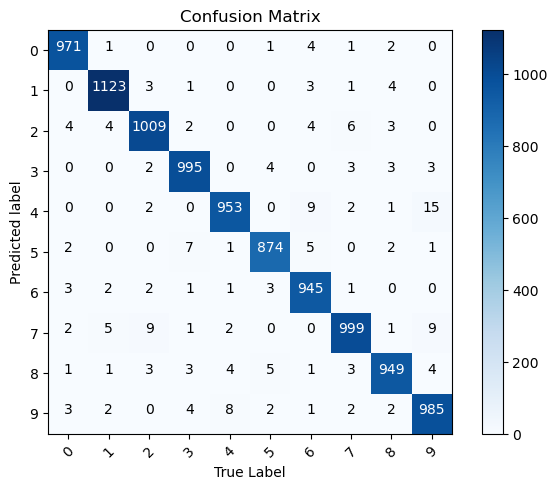

In [24]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color='white' if cm[i,j] > thresh else 'black'
                 )
    plt.tight_layout()
    plt.xlabel('True Label')
    plt.ylabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 5 Predicted: 6')

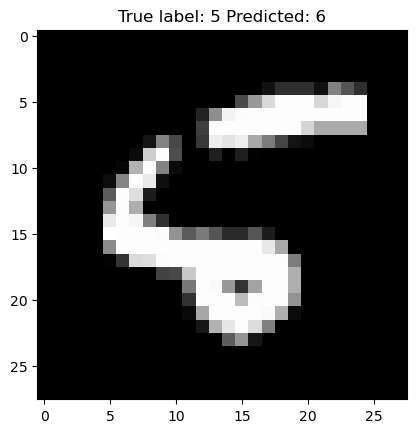

In [28]:
# Show misclassified examples
misclass_id = np.where(p_test != y_test)[0]
i = np.random.choice(misclass_id)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))